In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.4 MB/s 


In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 3.8 MB/s 
     |████████████████████████████████| 1.7 MB 7.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 14.3 MB/s 
     |████████████████████████████████| 167 kB 37.0 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 261 kB 36.3 MB/s 
     |████████████████████████████████| 113 kB 37.6 MB/s 
     |████████████████████████████████| 2.0 MB 29.1 MB/s 
     |████████████████████████████████| 15.5 MB 35.3 MB/s 
     |████████████████████████████████| 6.8 MB 46.4 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 10.1 MB 42.2 MB/s 
     |████████████████████████████████| 62 kB 981 kB/s 
     |████████████████████████████████| 675 kB 46.1 MB/s 
     |███████████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [ ]:
# 제출 점수(제출 날짜) : 0.6886392929(2021-12-28 14:05:53)

# 설정

In [ ]:
# pycaret : blend(cat/lgbm)
# probability_threshold : ⭕(0.2982)
# tune : ❌(자체 점수 떨어짐.)
# combine
# 순서형 특성 수치형으로 지정(4개) : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [ ]:
# 'id', 'contents_open_dt' 제거 : ⭕
# 모든 값이 1인 'person_prefer_f', 'person_prefer_g' 열 제거 : ⭕
# contents_rn 제거 : ⭕

In [ ]:
# 차이가 비교적 많이 나는 특성(25+1개)만 훈련/예측 : ⭕

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# h_l_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_i
# contents_attribute_a

# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h
##############################
# person_rn

# 데이터 불러오기

In [ ]:
# train = pd.read_csv('../data/train.csv')
# test = pd.read_csv('../data/test.csv')
train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/test.csv')

# 데이터 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [ ]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [ ]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [ ]:
test_col = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
 'person_prefer_e',
 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
 'contents_attribute_i', 'contents_attribute_a',
 'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
 'contents_attribute_l', 'contents_attribute_d',
 'contents_attribute_m', 'contents_attribute_e',
 'contents_attribute_h',
 'person_rn']
target = ['target']
train_col = test_col + target
len(train_col), len(test_col)

(27, 26)

In [ ]:
train = train[train_col]
test = test[test_col]

## 훈련에 의미가 적은 열 제거

In [ ]:
# train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn'], axis=1) 
# test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g', 'contents_rn'], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   person_attribute_a      501951 non-null  int64
 5   person_attribute_a_1    501951 non-null  int64
 6   person_attribute_b      501951 non-null  int64
 7   person_prefer_c         501951 non-null  int64
 8   person_prefer_d_1       501951 non-null  int64
 9   person_prefer_d_2       501951 non-null  int64
 10  person_prefer_d_3       501951 non-null  int64
 11  person_prefer_e         501951 non-null  int64
 12  person_prefer_h_1       501951 non-null  int64
 13  person_prefer_h_2       501951 non-null  int64
 14  person_prefer_h_3       501951 non-null  int64
 15  

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   person_attribute_a      46404 non-null  int64
 5   person_attribute_a_1    46404 non-null  int64
 6   person_attribute_b      46404 non-null  int64
 7   person_prefer_c         46404 non-null  int64
 8   person_prefer_d_1       46404 non-null  int64
 9   person_prefer_d_2       46404 non-null  int64
 10  person_prefer_d_3       46404 non-null  int64
 11  person_prefer_e         46404 non-null  int64
 12  person_prefer_h_1       46404 non-null  int64
 13  person_prefer_h_2       46404 non-null  int64
 14  person_prefer_h_3       46404 non-null  int64
 15  contents_attribute_

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [ ]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,target
0,True,True,True,False,1,4,3,5,275,370,369,8,4,95,59,3,3,2,10,1,1608,275,1,4,139,618822,1
1,False,False,False,True,1,3,4,1,114,181,175,4,131,101,96,1,3,1,5,1,1608,275,1,4,133,571659,0
2,False,False,False,True,2,0,3,5,464,175,452,3,54,263,56,3,1,2,10,1,1600,94,1,4,53,399816,0
3,False,False,False,True,2,0,2,5,703,705,704,3,72,227,2,1,3,1,5,1,1608,275,5,3,74,827967,0
4,True,True,True,False,1,3,4,5,275,370,369,4,214,210,209,1,1,2,10,1,1608,275,1,4,74,831614,0


In [ ]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn
0,True,False,False,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,2,10,1,1147,839,1,5,263,393790
1,False,False,False,True,2,0,2,2,683,1086,662,2,258,263,49,1,3,1,5,1,1611,278,1,4,263,394058
2,True,False,False,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,1,3,1,1817,490,3,4,177,1002061
3,True,False,False,True,1,2,2,5,114,181,175,4,177,170,171,3,3,1,5,1,101,150,5,3,177,1000813
4,True,False,False,True,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,1,5,1,985,1097,1,4,177,111146


# 모델 훈련/예측

In [ ]:
# 순서형 특성 수치형으로 지정(4개) : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [ ]:
ex = setup(train, target='target', n_jobs=-1, use_gpu=True,
           session_id=0, verbose=True, silent=True, 
           fold=5, fold_shuffle=True, combine_rare_levels=True, 
           numeric_features=['person_attribute_a_a', 'person_attribute_b',
                             'person_prefer_e', 'contents_attribute_e']
           )

,Description,Value
0,session_id,0
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(501951, 27)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(sort='F1')
# 37m

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6131,0.6592,0.6717,0.6010,0.6344,0.2263,0.2279,5.712
catboost,CatBoost Classifier,0.6116,0.6568,0.6612,0.6012,0.6298,0.2232,0.2244,15.628
rf,Random Forest Classifier,0.6135,0.6598,0.6249,0.6106,0.6177,0.2270,0.2270,87.202
gbc,Gradient Boosting Classifier,0.5994,0.6412,0.6356,0.5924,0.6132,0.1988,0.1993,89.562
ada,Ada Boost Classifier,0.5924,0.6315,0.6158,0.5879,0.6015,0.1847,0.1850,20.088
et,Extra Trees Classifier,0.5927,0.6319,0.5919,0.5925,0.5922,0.1854,0.1854,90.284
ridge,Ridge Classifier,0.5857,0.0000,0.6011,0.5828,0.5918,0.1715,0.1716,0.580
lda,Linear Discriminant Analysis,0.5857,0.6195,0.6011,0.5828,0.5918,0.1715,0.1716,3.584
qda,Quadratic Discriminant Analysis,0.4997,0.5002,0.7366,0.5000,0.5896,-0.0003,-0.0010,1.934
dt,Decision Tree Classifier,0.5489,0.5489,0.5501,0.5484,0.5493,0.0978,0.0978,11.046


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# 모델 생성1
model1 = create_model('catboost')
# 6m 35s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6107,0.6560,0.6623,0.6001,0.6297,0.2215,0.2227
1,0.6091,0.6546,0.6578,0.5991,0.6271,0.2182,0.2192
2,0.6139,0.6599,0.6606,0.6039,0.6310,0.2279,0.2289
3,0.6141,0.6583,0.6625,0.6037,0.6317,0.2282,0.2293
4,0.6110,0.6553,0.6640,0.6001,0.6304,0.2221,0.2234
Mean,0.6118,0.6568,0.6614,0.6014,0.6300,0.2236,0.2247
SD,0.0019,0.0020,0.0021,0.0020,0.0016,0.0039,0.0039


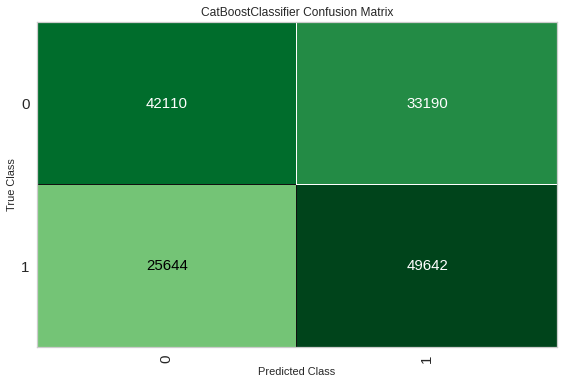

In [ ]:
plot_model(model1, plot='confusion_matrix')

In [ ]:
# 모델 생성2
model2 = create_model('lightgbm')
# 6m 35s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6118,0.6586,0.6695,0.5999,0.6328,0.2236,0.2252
1,0.6128,0.6574,0.6721,0.6005,0.6343,0.2256,0.2272
2,0.6147,0.6629,0.6736,0.6023,0.6360,0.2294,0.2310
3,0.6135,0.6588,0.6723,0.6012,0.6348,0.2270,0.2286
4,0.6130,0.6584,0.6708,0.6010,0.6340,0.2261,0.2276
Mean,0.6131,0.6592,0.6717,0.6010,0.6344,0.2263,0.2279
SD,0.0009,0.0019,0.0014,0.0008,0.0010,0.0019,0.0019


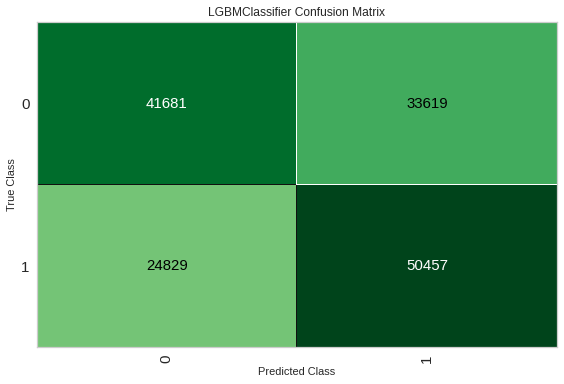

In [ ]:
plot_model(model2, plot='confusion_matrix')

In [ ]:
# tune model
tuned_model2 = tune_model(model2, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6245,0.6716,0.6683,0.6141,0.6401,0.2489,0.2499
1,0.6222,0.6709,0.6661,0.6120,0.6379,0.2444,0.2454
2,0.6254,0.6744,0.6683,0.6152,0.6406,0.2508,0.2517
3,0.6248,0.6731,0.6686,0.6145,0.6404,0.2497,0.2506
4,0.6243,0.6729,0.6689,0.6138,0.6402,0.2486,0.2496
Mean,0.6242,0.6726,0.6680,0.6139,0.6398,0.2485,0.2495
SD,0.0011,0.0012,0.0010,0.0011,0.0010,0.0022,0.0022


In [ ]:
# blend
blended_model = blend_models([model1, model2], optimize='F1', method='soft')
# 2m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6123,0.6585,0.6671,0.6009,0.6322,0.2246,0.2259
1,0.6115,0.6572,0.6658,0.6003,0.6313,0.2231,0.2244
2,0.6146,0.6627,0.6681,0.6033,0.6340,0.2293,0.2307
3,0.6140,0.6598,0.6676,0.6026,0.6335,0.2280,0.2293
4,0.6136,0.6581,0.6697,0.6019,0.6340,0.2273,0.2287
Mean,0.6132,0.6593,0.6676,0.6018,0.6330,0.2264,0.2278
SD,0.0011,0.0019,0.0013,0.0011,0.0011,0.0023,0.0023


In [ ]:
# optimize threshold for trained model
optimize_threshold(blended_model, false_negative=-1500, false_positive=-500)
# 48s

0.2932

Optimized Probability Threshold: 0.2932 | Optimized Cost Function: -35927500


In [ ]:
# blend
blended_model2 = blend_models([model1, tuned_model2], optimize='F1', method='soft')
# 2m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6229,0.6707,0.6722,0.6115,0.6405,0.2458,0.2470
1,0.6211,0.6697,0.6695,0.6102,0.6384,0.2423,0.2435
2,0.6236,0.6743,0.6699,0.6128,0.6401,0.2472,0.2483
3,0.6238,0.6728,0.6717,0.6127,0.6408,0.2476,0.2488
4,0.6217,0.6713,0.6709,0.6105,0.6393,0.2434,0.2446
Mean,0.6226,0.6717,0.6709,0.6115,0.6398,0.2453,0.2464
SD,0.0010,0.0016,0.0010,0.0011,0.0009,0.0021,0.0021


In [ ]:
# optimize threshold for trained model
optimize_threshold(blended_model2, false_negative=-5000, false_positive=-1500)
# 48s

Optimized Probability Threshold: 0.2521 | Optimized Cost Function: -107609500


0.2521

## train 예측, F1 자체평가

In [ ]:
th = 0.2932

In [ ]:
# train예측
train_pred = predict_model(blended_model, train, probability_threshold=th)

In [ ]:
from pycaret.utils import check_metric
check_metric(train['target'], train_pred['Label'], metric = 'F1')
# fn, fp = -1500, -500 -> 0.2602/0.6841
# fn, fp = -5000, -1500 -> 

0.6841

In [ ]:
th2 = 0.2982

In [ ]:
# train예측
train_pred2 = predict_model(blended_model2, train, probability_threshold=th2)

In [ ]:
check_metric(train['target'], train_pred2['Label'], metric = 'F1')
# fn, fp = -1500, -500 -> 0.2982/0.6911
# fn, fp = -5000, -1500 -> 0.2521/0.6904

0.6911

## test 예측

In [ ]:
# 예측
pred = predict_model(blended_model2, test, probability_threshold=th2)

In [ ]:
pred.iloc[:,-2:].head(20)

,Label,Score
0,1,0.4957
1,1,0.4762
2,1,0.3865
3,1,0.5151
4,1,0.5855
5,0,0.7621
6,1,0.5345
7,0,0.8198
8,1,0.5378
9,1,0.3969


In [ ]:
pred['Label']

0        1
1        1
2        1
3        1
4        1
        ..
46399    1
46400    1
46401    1
46402    1
46403    1
Name: Label, Length: 46404, dtype: int64

In [ ]:
pred['Label'].value_counts()

1    41931
0     4473
Name: Label, dtype: int64

# 제출파일 불러오기

In [ ]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


In [ ]:
sub.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# 제출파일 생성

In [ ]:
sub['target'] = pred['Label']
sub.to_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver2.6.csv', index=False)

In [ ]:
sub.head(10)

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,0
6,6,1
7,7,0
8,8,1
9,9,1


# 코드 마지막